# The Empirical Rule in Normal Distribution

The empirical rule (with other term the 68 - 95 - 99.7 rule) describes how many observations fall within a certain distance from our mean.  This distance from the mean is denoted as sigma, or standard deviation. To explain this rule well, let us produce a data of normal distribution, with 1 million elements, whose mean value is 10, and standart deviation is 3. You can choose different values.

**First let us import related libraries!**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Let use **random.seed** for reproducibility of the same values! To produce normally distributed data, we can use **list comprehension method** with **random.normalvariate function!**

In [18]:
random.seed(99)
mean = 10
std = 3
data = [random.normalvariate(mean, std) for _ in range(1000000)]

Let us **illustrate the data by histogram**, and sign the **1, 2 and 3 standart deviations** from mean value, by **vertical lines** on both side!**

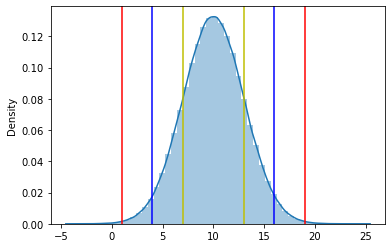

In [33]:
sns.distplot(data)
plt.axvline(np.mean(data) + np.std(data), color = "y")
plt.axvline(np.mean(data) - np.std(data), color = "y")
plt.axvline(np.mean(data) + (np.std(data) * 2), color = "b")
plt.axvline(np.mean(data) - (np.std(data) * 2), color = "b")
plt.axvline(np.mean(data) + (np.std(data) * 3), color = "r")
plt.axvline(np.mean(data) - (np.std(data) * 3), color = "r")

**Let us check our data's statistics, especillay the count, mean and standart values!**

In [20]:
pd.DataFrame(data).describe()

,0
count,1000000.000000
mean,10.004118
std,3.000036
min,-3.956195
25%,7.979604
50%,10.005029
75%,12.028933
max,24.864884


**Let us draw 6 samples,each of them 100 element, from our data!**

In [34]:
Sample1 = random.sample(data, 100)
Sample2 = random.sample(data, 100)
Sample3 = random.sample(data, 100)
Sample4 = random.sample(data, 100)
Sample5 = random.sample(data, 100)
Sample6 = random.sample(data, 100)

**Let us illustrate them by histogram to see them distributed as expected!**

<AxesSubplot:ylabel='Density'>

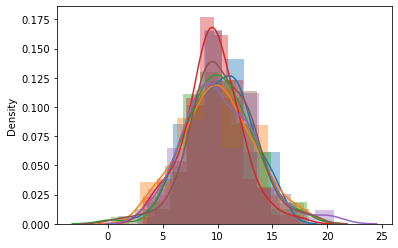

In [49]:
sns.distplot(Sample1)
sns.distplot(Sample2)
sns.distplot(Sample3)
sns.distplot(Sample4)
sns.distplot(Sample5)
sns.distplot(Sample6)

**Let us compare them with original data!**

<AxesSubplot:ylabel='Density'>

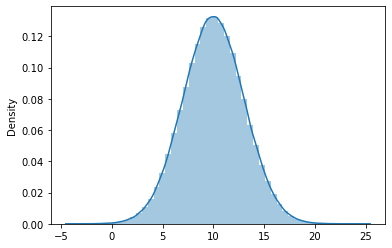

In [48]:
sns.distplot(data)

**Now let us see the probability values between 0.025 - 0.975 (a range of 95) remained between 2 standart deviation distances!**

**ECDF** is a function from **statsmodels** and returns the Empirical **CDF (cumulative distribution function)** of an array.

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt

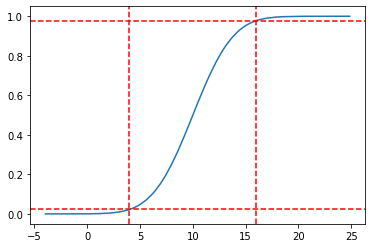

In [26]:
ecdf = ECDF(data)
plt.plot(ecdf.x, ecdf.y)

plt.axhline(y = 0.025, color = 'r', linestyle='--')
plt.axhline(y = 0.975, color = 'r', linestyle='--')
plt.axvline(x = np.mean(data) - (2 * np.std(data)), color = 'r', linestyle='--')
plt.axvline(x = np.mean(data) + (2 * np.std(data)), color = 'r', linestyle='--')

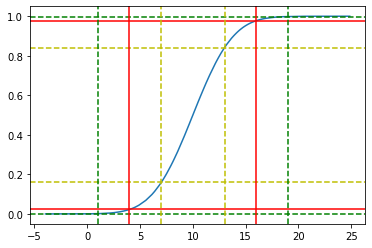

In [58]:
ecdf = ECDF(data)
plt.plot(ecdf.x, ecdf.y)

plt.axhline(y = 0.16, color = 'y', linestyle='--')
plt.axhline(y = 0.84, color = 'y', linestyle='--')
plt.axhline(y = 0.025, color = 'r', linestyle='-')
plt.axhline(y = 0.975, color = 'r', linestyle='-')
plt.axhline(y = 0.0015, color = 'g', linestyle='--')
plt.axhline(y = 0.9985, color = 'g', linestyle='--')
plt.axvline(x = np.mean(data) - np.std(data), color = 'y', linestyle='--')
plt.axvline(x = np.mean(data) + np.std(data), color = 'y', linestyle='--')
plt.axvline(x = np.mean(data) - (2 * np.std(data)), color = 'r', linestyle='-')
plt.axvline(x = np.mean(data) + (2 * np.std(data)), color = 'r', linestyle='-')
plt.axvline(x = np.mean(data) - (3 * np.std(data)), color = 'g', linestyle='--')
plt.axvline(x = np.mean(data) + (3 * np.std(data)), color = 'g', linestyle='--')

**Great! Yellow line depicts values between 0.16-0.84 (68), red lines 0.025 - 0.975 (95), green lines 0.0015-0.9985 (99.7).**